## Exploratory Data Analysis

In [67]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
train_set = pd.read_csv('data/train.csv')
test_set = pd.read_csv('data/test.csv')
store_set = pd.read_csv('data/store.csv')

C:\Users\kiiru\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
train_set.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
test_set.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [65]:
store_set.sample(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
230,231,d,c,3840.0,10.0,2008.0,1,39.0,2010.0,"Feb,May,Aug,Nov"
459,460,a,a,34050.0,4.0,2008.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
681,682,b,a,150.0,9.0,2006.0,0,NaN,NaN,NaN
752,753,d,c,540.0,11.0,2012.0,1,35.0,2010.0,"Mar,Jun,Sept,Dec"
317,318,d,c,32330.0,3.0,2014.0,0,NaN,NaN,NaN
955,956,a,a,2330.0,10.0,2014.0,1,18.0,2011.0,"Feb,May,Aug,Nov"
940,941,a,a,1200.0,12.0,2011.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
312,313,d,c,14160.0,NaN,NaN,0,NaN,NaN,NaN
807,808,a,a,18620.0,NaN,NaN,1,31.0,2009.0,"Feb,May,Aug,Nov"


In [5]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [11]:
store_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [7]:
train_set.nunique()

Store             1115
DayOfWeek            7
Date               942
Sales            21734
Customers         4086
Open                 2
Promo                2
StateHoliday         5
SchoolHoliday        2
dtype: int64

In [83]:
store_set.nunique()

Store                        1115
StoreType                       4
Assortment                      3
CompetitionDistance           654
CompetitionOpenSinceMonth      12
CompetitionOpenSinceYear       23
Promo2                          2
Promo2SinceWeek                24
Promo2SinceYear                 7
PromoInterval                   3
dtype: int64

In [8]:
train_set['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [17]:
#train_set.isnull().values.any(); 
test_set.isnull().values.any(); 
#store_set.isnull().values.any()

True

In [21]:
season = train_set.filter(['Date', 'Sales'], axis=1)
season.head()

,Date,Sales
0,2015-07-31,5263
1,2015-07-31,6064
2,2015-07-31,8314
3,2015-07-31,13995
4,2015-07-31,4822


In [22]:
season.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   Date    1017209 non-null  object
 1   Sales   1017209 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 15.5+ MB


In [23]:
season['Date'] = season['Date'].astype('datetime64')

In [24]:
season.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   Date    1017209 non-null  datetime64[ns]
 1   Sales   1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 15.5 MB


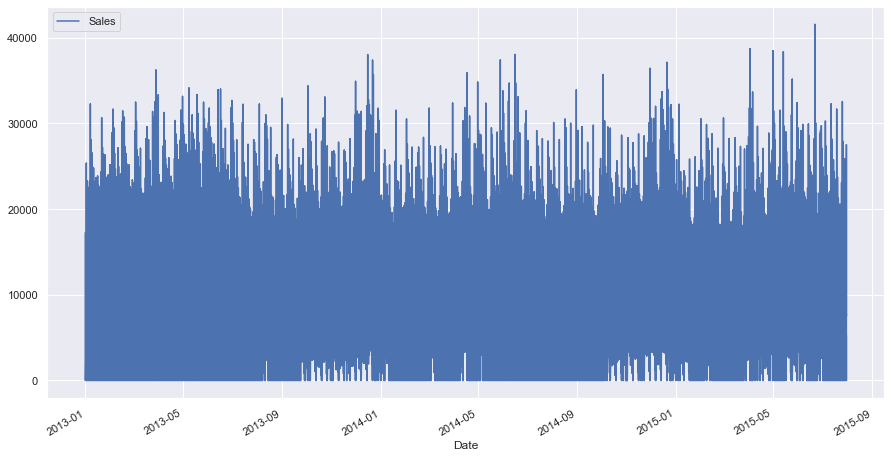

In [31]:
season.set_index('Date', inplace=True, drop=True)
season.plot(figsize=(15,8))
plt.show()

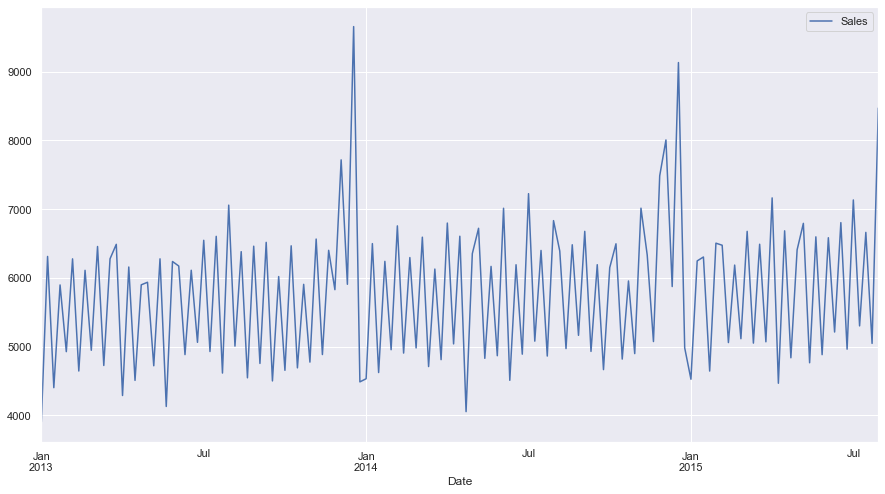

In [37]:
season_weekly = season.resample('W').mean()

season_weekly.plot(figsize=(15,8))
plt.show()

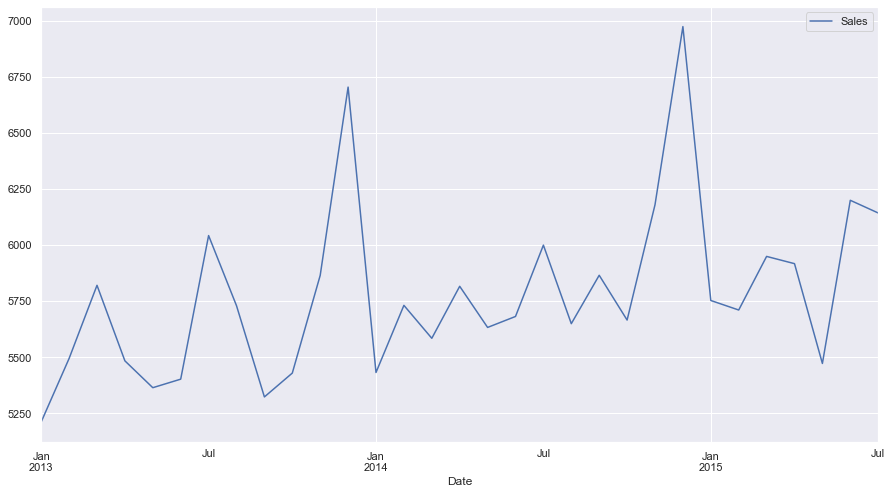

In [36]:
season_monthly = season.resample('M').mean()

season_monthly.plot(figsize=(15,8))
plt.show()

In [38]:
stateholiday = train_set.filter(['StateHoliday', 'Sales'], axis=1)
stateholiday.head()

,StateHoliday,Sales
0,0,5263
1,0,6064
2,0,8314
3,0,13995
4,0,4822


In [44]:
stateholiday_sales = stateholiday.groupby(['StateHoliday']).agg({'Sales': ['mean','sum']})
stateholiday_sales.columns = ['Mean','Total']
stateholiday_sales = stateholiday_sales.reset_index()
stateholiday_sales

,StateHoliday,Mean,Total
0,0,5733.530624,751505326
1,0,5980.279717,5113659442
2,a,290.735686,5890305
3,b,214.311510,1433744
4,c,168.733171,691806


<function matplotlib.pyplot.show(*args, **kw)>

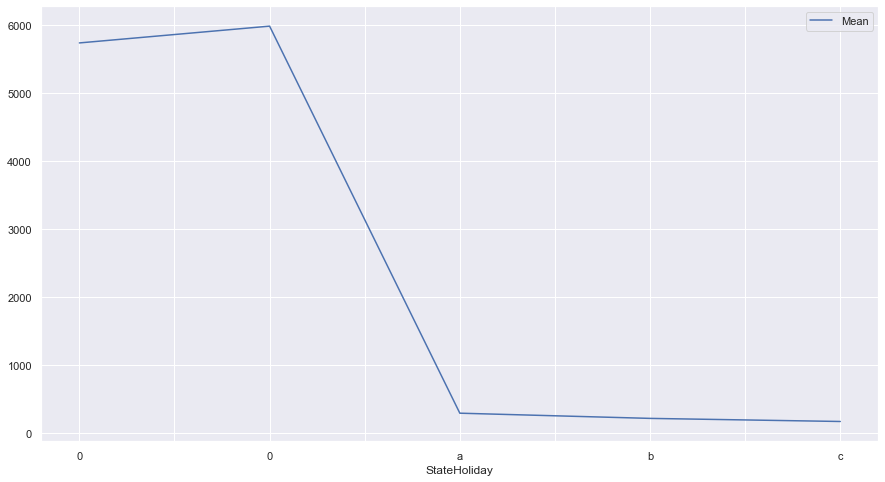

In [46]:
stateholiday_sales.plot('StateHoliday', 'Mean', figsize=(15,8))
plt.show

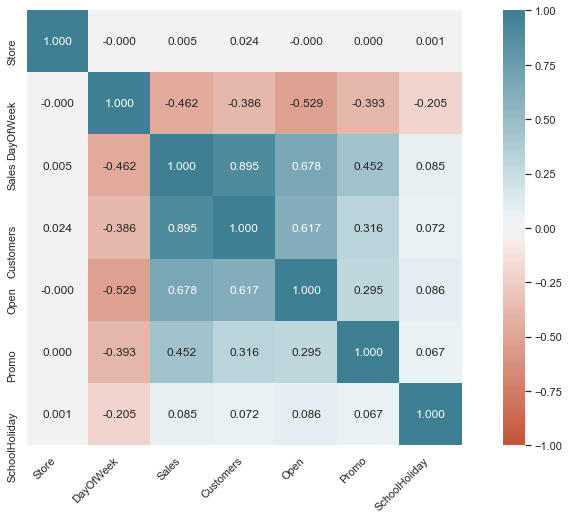

In [92]:
fig, ax = plt.subplots(figsize=(15,8))

corr = train_set.corr()
sns.heatmap(
    corr,
    annot=True, fmt='.3f', annot_kws = {'size':12},
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);


In [ ]:
x = sns.relplot(x='date', y='hour', data=data, col='experiment', hue='yes', kind='line')
ax.set(xlim=([datetime.date(2020, 7, 3), datetime.date(2020, 7, 10)]))

       Total Sales  Total Customers
Promo                              
0       2771974337        325777807
1       3101206286        318263948


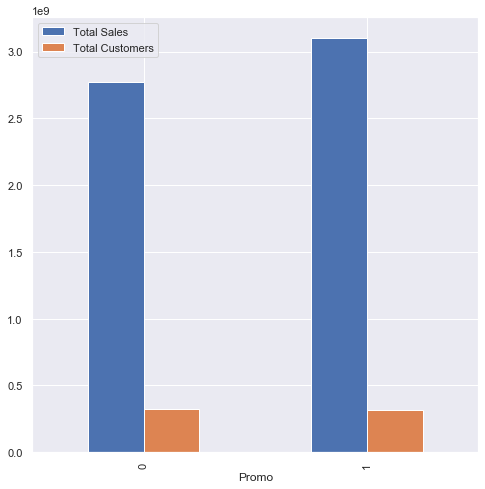

In [103]:
promotion_data = train_set.filter(['Sales', 'Customers', 'Promo'], axis=1)
promotion_data = promotion_data.groupby(['Promo']).agg({'Sales':['sum'], 'Customers':['sum']})
promotion_data.columns = ['Total Sales', 'Total Customers']
promotion_data = promotion_data.reset_index()
promotion_data.set_index('Promo', inplace=True, drop=True)

print(promotion_data)
promotion_data.plot.bar(figsize=(8,8))
plt.show()

In [64]:
customer_behavior = train_set.filter(['Date', 'Customers', 'Open'], axis=1)
customer_behavior.sample(10)

,Date,Customers,Open
106998,2015-04-27,677,1
1017189,2013-01-01,0,0
577137,2014-01-30,1456,1
407422,2014-07-02,656,1
74865,2015-05-25,0,0
870429,2013-05-12,0,0
466538,2014-05-09,601,1
426252,2014-06-15,0,0
601482,2014-01-08,920,1
591806,2014-01-17,901,1


            Total Sales  Average Sales
Assortment                            
a            2945750070    5481.026096
b              70946312    8553.931999
c            2856484241    6058.676567


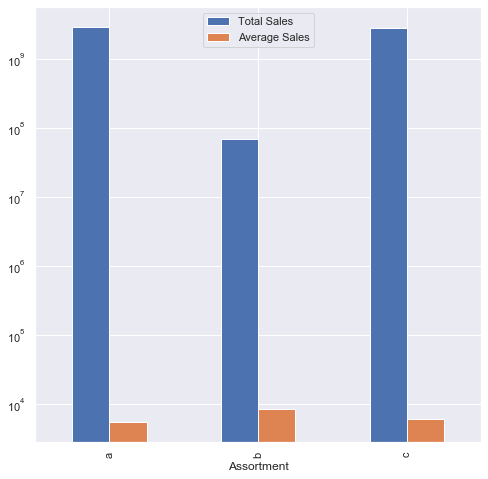

In [104]:
store_sales = train_set.filter(['Store','Sales'], axis=1)
store_assortment = store_set.filter(['Store', 'Assortment'], axis = 1)
assortment_data = pd.merge(store_sales, store_assortment, on='Store')

assortment_data.drop(['Store'], axis=1)
assortment_data.set_index('Assortment', inplace=True, drop=True)
assortment_data = assortment_data.groupby(['Assortment']).agg({'Sales':['sum','mean']})
assortment_data.columns = ['Total Sales', 'Average Sales']
assortment_data.reset_index()

print(assortment_data)
assortment_data.plot.bar(logy=True, figsize=(8,8))
plt.show()

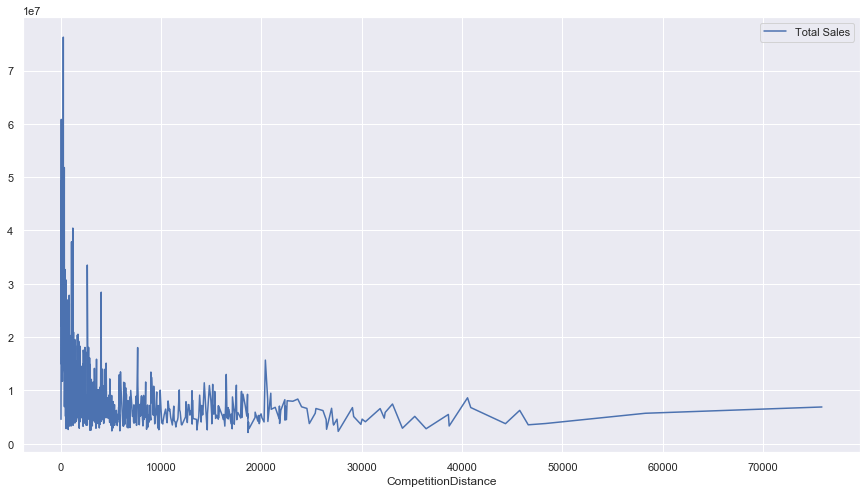

In [89]:
store_sales = train_set.filter(['Store','Sales'], axis=1)
store_Competition_dist = store_set.filter(['Store', 'CompetitionDistance'], axis = 1)
competition_data = pd.merge(store_sales, store_Competition_dist, on='Store')

competition_data = competition_data.drop(['Store'], axis=1)
competition_data.set_index('CompetitionDistance', inplace=True, drop=True)
competition_data = competition_data.groupby(['CompetitionDistance']).agg({'Sales':['sum']})
competition_data.columns = ['Total Sales']
competition_data.reset_index()

competition_data.plot(figsize=(15,8))
plt.show()

        Total Sales  Average Sales
Promo2                            
0        3111542628    6124.710161
1        2761637995    5423.718218


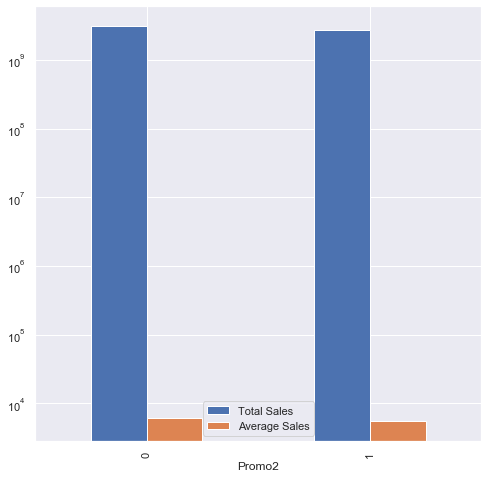

In [106]:
store_sales = train_set.filter(['Store','Sales'], axis=1)
store_promo2 = store_set.filter(['Store', 'Promo2'], axis = 1)
promo2_data = pd.merge(store_sales, store_promo2, on='Store')

promo2_data = promo2_data.drop(['Store'], axis=1)
promo2_data.set_index('Promo2', inplace=True, drop=True)
promo2_data = promo2_data.groupby(['Promo2']).agg({'Sales':['sum','mean']})
promo2_data.columns = ['Total Sales', 'Average Sales']
promo2_data.reset_index()

print(promo2_data)
promo2_data.plot.bar(logy=True, figsize=(8,8))
plt.show()

                  Total Sales  Average Sales
PromoInterval                               
Feb,May,Aug,Nov     629869118    5311.048585
Jan,Apr,Jul,Oct    1630451279    5562.364063
Mar,Jun,Sept,Dec    501317598    5143.829243


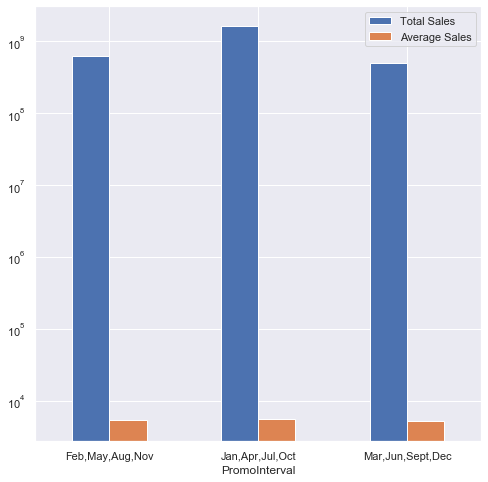

In [112]:
store_sales = train_set.filter(['Store','Sales'], axis=1)
store_promo_interval = store_set.filter(['Store', 'PromoInterval'], axis = 1)
promo_interval_data = pd.merge(store_sales, store_promo_interval, on='Store')

promo_interval_data = promo_interval_data.drop(['Store'], axis=1)
promo_interval_data = promo_interval_data.dropna()
promo_interval_data.set_index('PromoInterval', inplace=True, drop=True)

promo_interval_data = promo_interval_data.groupby(['PromoInterval']).agg({'Sales':['sum','mean']})
promo_interval_data.columns = ['Total Sales', 'Average Sales']
promo_interval_data.reset_index()

print(promo_interval_data.head())

promo_interval_data.plot.bar(logy=True, rot=0, figsize=(8,8))
plt.show()

In [107]:
train_set['DayOfWeek'].unique()

array([5, 4, 3, 2, 1, 7, 6], dtype=int64)

In [ ]:
s = train_set.filter(['Store','DayOfWeek', 'Open'], axis=1)
s = s.groupby(['Store', 'DayOfWeek', 'Open'])